# Airbnb Data for New York
### 3 Things You Should Know Before Booking an Airbnb in New York

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, fbeta_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
import datetime
from pprint import pprint
import seaborn as sns

%matplotlib inline

## Step 0: Import & Assess Data

In [80]:
# Load in csv files
calendar2017_df = pd.read_csv('calendar2017.csv')
calendar2018_df = pd.read_csv('calendar2018.csv')
listings2017_df = pd.read_csv('listings_detailed2017.csv')
listings2018_df = pd.read_csv('listings_detailed2018.csv')
neighborhoods_df = pd.read_csv('neighbourhoods.csv')
reviews_df = pd.read_csv('reviews_detailed.csv')

C:\Users\giust\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\giust\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### calendar_df

Detailed Calendar Data for listings in New York City

In [3]:
calendar2017_df.head()

,listing_id,date,available,price
0,2515,2018-09-01,t,$89.00
1,2515,2018-05-08,t,$89.00
2,2515,2018-05-07,t,$89.00
3,2515,2018-05-06,t,$89.00
4,2515,2018-05-05,t,$89.00


In [4]:
calendar2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15022305 entries, 0 to 15022304
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 458.4+ MB


In [5]:
calendar2017_df['available'].value_counts()

f    9808176
t    5214129
Name: available, dtype: int64

In [6]:
calendar2018_df.head()

,listing_id,date,available,price
0,14314,2019-09-07,t,$154.00
1,14314,2019-09-06,t,$154.00
2,14314,2019-09-05,t,$144.00
3,14314,2019-09-04,t,$144.00
4,14314,2019-09-03,t,$144.00


In [7]:
calendar2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330300 entries, 0 to 18330299
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 559.4+ MB


In [10]:
calendar2018_df['available'].value_counts()

f    12549361
t     5780939
Name: available, dtype: int64

> **calendar_df - To Clean**
- **date** - change type to datetime
- **available** - update type to boolean True/False
- **price** - change type to float

#### listings_df

Detailed Listings data for New York City

In [81]:
listings2018_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20180908060534,2018-09-08,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.41
1,2539,https://www.airbnb.com/rooms/2539,20180908060534,2018-09-08,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.24
2,2595,https://www.airbnb.com/rooms/2595,20180908060534,2018-09-08,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.32
3,3330,https://www.airbnb.com/rooms/3330,20180908060534,2018-09-08,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.31
4,3647,https://www.airbnb.com/rooms/3647,20180908060534,2018-09-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN


In [82]:
listings2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50220 entries, 0 to 50219
Data columns (total 96 columns):
id                                  50220 non-null int64
listing_url                         50220 non-null object
scrape_id                           50220 non-null int64
last_scraped                        50220 non-null object
name                                50195 non-null object
summary                             48360 non-null object
space                               34428 non-null object
description                         49793 non-null object
experiences_offered                 50220 non-null object
neighborhood_overview               29794 non-null object
notes                               19829 non-null object
transit                             31136 non-null object
access                              29056 non-null object
interaction                         27817 non-null object
house_rules                         29928 non-null object
thumbnail_url          

In [83]:
# Review % NaN for each field
listings_nan_df = pd.DataFrame((listings2018_df.isnull().sum() / listings2018_df.shape[0])).reset_index().sort_values(by=0,ascending=False)
listings_nan_df = listings_nan_df.rename(columns={'index': 'feature', 0: '%_nan'})
listings_nan_df.head()

,feature,%_nan
15,thumbnail_url,1.000000
27,host_acceptance_rate,1.000000
18,xl_picture_url,1.000000
16,medium_url,1.000000
87,license,0.999861


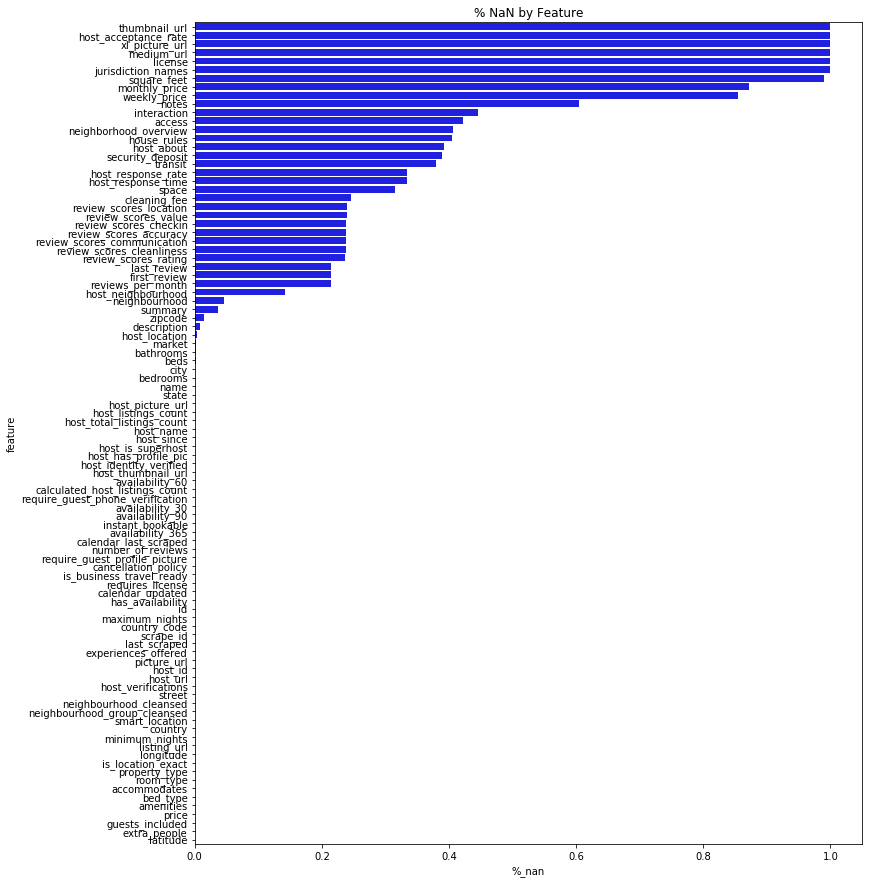

In [84]:
fig, ax = plt.subplots(figsize=(10,12))
plt.tight_layout()

sns.barplot(listings_nan_df['%_nan'], listings_nan_df['feature'], color='b', )
ax.set_title('% NaN by Feature');

In [86]:
listings2018_df[list(listings_nan_df['feature'])[10:35]].head()

,interaction,access,neighborhood_overview,house_rules,host_about,security_deposit,transit,host_response_rate,host_response_time,space,...,review_scores_communication,review_scores_cleanliness,review_scores_rating,last_review,first_review,reviews_per_month,host_neighbourhood,neighbourhood,summary,zipcode
0,We will have a list of Harlem restaurants and ...,Guests will have their PRIVATE BATHROOM (NOTE:...,NaN,no-smoking/please take off your shoes: cleanin...,loves to host and welcome travelers from arou...,$0.00,Subway 2.3.B.C. at 110th street around the cor...,93%,within a few hours,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,...,9.0,9.0,93.0,2018-07-05,2008-10-13,1.41,Harlem,Harlem,Step into our artistic spacious apartment and ...,10026
1,NaN,NaN,Close to Prospect Park and Historic Ditmas Park,-The security and comfort of all our guests is...,Educated professional living in Brooklyn. I l...,$100.00,Very close to F and G trains and Express bus i...,100%,within an hour,"Spacious, renovated, and clean apt home, one b...",...,10.0,10.0,98.0,2018-07-17,2015-12-04,0.24,Gravesend,Kensington,Renovated apt home in elevator building.,11218
2,I am a Sound Therapy Practitioner and Kundalin...,"Guests have full access to the kitchen, bathro...",Centrally located in the heart of Manhattan ju...,"Make yourself at home, respect the space and t...",A New Yorker since 2000! My passion is creatin...,$350.00,Apartment is located on 37th Street between 5t...,79%,within a day,"- Spacious (500+ft²), immaculate and nicely fu...",...,10.0,9.0,94.0,2018-06-29,2009-11-21,0.32,Midtown,Midtown,"Find your romantic getaway to this beautiful, ...",10018
3,I will likely not be around as my room (Pentho...,The apartment is equipped with full kitchen (m...,Location is GREAT!! Right off the L train in t...,Guests should be respectful of the home and th...,From Brooklyn with love.,$150.00,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,100%,within a day,"Room Features: - clean, hardwood floors - 2 la...",...,10.0,10.0,97.0,2018-06-15,2010-01-04,0.31,East Williamsburg,Williamsburg,"This is a spacious, clean, furnished master be...",11206
4,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,Make Up Artist National/ (Website hidden by Ai...,$200.00,NaN,NaN,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,...,NaN,NaN,NaN,NaN,NaN,NaN,Harlem,Harlem,NaN,10027


In [87]:
# Check for duplicated IDs
listings2018_df['id'].duplicated().sum()

0

>**listings_df - To Clean**
- **Drop the folowing fields**
    - Any fields with > 50% NaN values
- **Drop the folowing rows** 
    - Any rows with > 30% NaN values
- **price** - change type to float
- **security_deposit** - change type to float
- **cleaning_fee** - change type to float

#### review_df

Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).

In [15]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,2515,859,2009-03-08,8455,Roland,Such a wonderful place and very close to the m...
2,2515,1083,2009-03-25,9759,Cem,I just got back from a trip to NYC during whic...
3,2515,1107,2009-03-27,9193,Holly,Stephanie's offered all the most important thi...
4,2515,2175,2009-05-09,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu..."


In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030208 entries, 0 to 1030207
Data columns (total 6 columns):
listing_id       1030208 non-null int64
id               1030208 non-null int64
date             1030208 non-null object
reviewer_id      1030208 non-null int64
reviewer_name    1030208 non-null object
comments         1029007 non-null object
dtypes: int64(3), object(3)
memory usage: 47.2+ MB


> **reviews_df - To Clean**
- **date** - change type to datetime
- **comments** - drop rows with missing comments

#### neighborhoods_df

Neighbourhood list for geo filter. Sourced from city or open source GIS files.

In [17]:
neighborhoods_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [18]:
neighborhoods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
neighbourhood_group    230 non-null object
neighbourhood          230 non-null object
dtypes: object(2)
memory usage: 3.7+ KB


> **neighborhoods_df - To Clean**
- Merge coordinates from `neighborhoods_geo` to this df

## Step 1: Data Preprocessing

In [114]:
# Create copies of original datasets
calendar2017_df_new = calendar2017_df.copy()
calendar2018_df_new = calendar2018_df.copy()
listings2017_df_new = listings2017_df.copy()
listings2018_df_new = listings2018_df.copy()
reviews_df_new = reviews_df.copy()
neighborhoods_df_new = neighborhoods_df.copy()

> **calendar_df - To Clean**
- **date** - change type to datetime
- **available** - update type to boolean True/False
- **price** - change type to float

In [115]:
calendar_17_18_df = calendar2017_df_new.append(calendar2018_df_new)
calendar_17_18_df.head()

,listing_id,date,available,price
0,2515,2018-09-01,t,$89.00
1,2515,2018-05-08,t,$89.00
2,2515,2018-05-07,t,$89.00
3,2515,2018-05-06,t,$89.00
4,2515,2018-05-05,t,$89.00


In [116]:
# Ceck for NaN values
calendar_17_18_df.isnull().sum()

listing_id           0
date                 0
available            0
price         22357537
dtype: int64

In [117]:
calendar_17_18_df = calendar_17_18_df[calendar_17_18_df['available'] == 't']

In [118]:
calendar_17_18_df.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [119]:
calendar_17_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995068 entries, 0 to 18330291
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 419.4+ MB


In [120]:
calendar_17_18_df['date'] = pd.to_datetime(calendar_17_18_df['date'])

In [121]:
# Convert 'date' column in calendar_df_new to datetime type
def parse_date(df, date_field):
    '''
    Converts date field to datetime type then parses out year, month, day into separate columns
    
    INPUT - dataframe, date field
    OUTPUT - None
    '''
    df[date_field] = pd.to_datetime(df[date_field])
    df['year'], df['month'], df['day'] = (df[date_field].apply(lambda x: x.year), 
                                          df[date_field].apply(lambda x: x.month),
                                          df[date_field].apply(lambda x: x.day))

In [122]:
parse_date(calendar_17_18_df, 'date')

In [123]:
# Convert 'available' column in calendar_df_new to boolean type
def bool_to_num(df, feat):
    '''
       Re-encodes boolean features from 't'/'f' to 1/0
       
       INPUT - dataframe, feature name
       OUTPUT - None
    '''
    df[feat] = df[feat].map({'t':1, 'f':0})

In [124]:
bool_to_num(calendar_17_18_df, 'available')

In [125]:
# Convert 'price' column in calendar_df_new to float type
def price_to_float(df, price_field):
    '''
    Converts prices from $xx.xx object type to xx.xx float type
    
    INPUT - dataframe, price field
    OUTPUT - None
    '''
    df[price_field] = df[price_field].replace('[\$,]', '', regex=True).astype(float)

In [126]:
price_to_float(calendar_17_18_df, 'price')

In [127]:
calendar_17_18_df.head()

,listing_id,date,available,price,year,month,day
0,2515,2018-09-01,1,89.0,2018,9,1
1,2515,2018-05-08,1,89.0,2018,5,8
2,2515,2018-05-07,1,89.0,2018,5,7
3,2515,2018-05-06,1,89.0,2018,5,6
4,2515,2018-05-05,1,89.0,2018,5,5


> 'price' is NaN if available = False, so I will drop all rows where 'available' = False

>**listings_df - To Clean**
- **Drop the folowing fields**
    - Any fields with > 50% NaN values
- **Drop the folowing rows** 
    - Any rows with > 30% NaN values
    - Any rows with missing 'review_scores_rating'
- **price** - change type to float
- **security_deposit** - change type to float
- **cleaning_fee** - change type to float

In [128]:
listings_df_new = listings2017_df_new.append(listings2018_df_new)
listings_df_new.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,f,NaN,NaN,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,f,NaN,NaN,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,f,NaN,NaN,f,NaN,flexible,f,f,1,NaN


In [129]:
listings_df_new = listings_df_new.rename(columns={"id": "listing_id"})
listings_df_new.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,f,NaN,NaN,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,f,NaN,NaN,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,f,NaN,NaN,f,NaN,flexible,f,f,1,NaN


In [131]:
calendar_df_new = pd.merge(calendar_17_18_df,listings_df_new[['listing_id','neighbourhood_group_cleansed']],on='listing_id')
calendar_df_new.head()

,listing_id,date,available,price,year,month,day,neighbourhood_group_cleansed
0,2515,2018-09-01,1,89.0,2018,9,1,Manhattan
1,2515,2018-09-01,1,89.0,2018,9,1,Manhattan
2,2515,2018-05-08,1,89.0,2018,5,8,Manhattan
3,2515,2018-05-08,1,89.0,2018,5,8,Manhattan
4,2515,2018-05-07,1,89.0,2018,5,7,Manhattan


In [164]:
calendar_df_new['listing_id'] = calendar_df_new['listing_id'].astype(str)

In [132]:
# Identify features with > 50% nan
listings_df_feat_to_remove = listings_nan_df[listings_nan_df['%_nan'] > 0.5]

In [133]:
listings_df_feat_to_remove

,feature,%_nan
15,thumbnail_url,1.000000
27,host_acceptance_rate,1.000000
18,xl_picture_url,1.000000
16,medium_url,1.000000
87,license,0.999861
88,jurisdiction_names,0.999542
59,square_feet,0.990442
62,monthly_price,0.872581
61,weekly_price,0.854182
10,notes,0.605157


In [134]:
# Drop features with > 50% nan from listings_df_new
listings_df_new = listings_df_new.drop(list(listings_df_feat_to_remove['feature']), axis=1)

In [135]:
listings_df_new.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,10.0,10.0,f,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,8.0,9.0,f,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,8.0,9.0,f,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,9.0,9.0,f,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,NaN,NaN,f,f,NaN,flexible,f,f,1,NaN


In [136]:
# Divide the data into two subsets based on the number of missing values in each row.
listings_df_new['nan_sum'] = np.where((listings_df_new.isnull().sum(axis=1) / listings_df_new.shape[1]) > 0.3, 'high_nan_count', 'low_nan_count')

In [137]:
listings_df_new['nan_sum'].value_counts()

low_nan_count     91322
high_nan_count       55
Name: nan_sum, dtype: int64

In [138]:
listings_df_new = listings_df_new[listings_df_new['nan_sum'] == 'low_nan_count']

In [139]:
listings_df_new = listings_df_new.drop('nan_sum', axis=1)

In [140]:
# Convert 'price' columns to float types
listings_price_fields = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

for field in listings_price_fields:
    price_to_float(listings_df_new, field)

In [141]:
# Create function that encodes boolean features to numeric values
listings_feat_bool_to_num = ['host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability',
                             'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_phone_verification',
                             'require_guest_profile_picture', 'host_is_superhost']

for feat in listings_feat_bool_to_num:
    bool_to_num(listings_df_new, feat)

In [142]:
listings_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91322 entries, 0 to 50219
Data columns (total 86 columns):
listing_id                          91322 non-null int64
listing_url                         91322 non-null object
scrape_id                           91322 non-null int64
last_scraped                        91322 non-null object
name                                91272 non-null object
summary                             87957 non-null object
space                               62609 non-null object
description                         90877 non-null object
experiences_offered                 91322 non-null object
neighborhood_overview               53893 non-null object
transit                             56915 non-null object
access                              52917 non-null object
interaction                         50634 non-null object
house_rules                         56030 non-null object
picture_url                         91322 non-null object
host_id                

In [143]:
listings_categorical = ['host_response_time', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'property_type',
                        'room_type', 'bed_type']

In [145]:
listings_df_feat_to_remove = ['last_scraped', 'experiences_offered', 'picture_url','neighbourhood', 'city', 'market',
                              'smart_location', 'country_code', 'calendar_updated', 'listing_url', 'scrape_id', 'host_url',
                              'host_thumbnail_url', 'host_picture_url', 'host_since', 'host_neighbourhood', 'host_verifications',
                              'neighbourhood_cleansed', 'zipcode', 'listing_id', 'host_id']

listings_df_new = listings_df_new.drop(listings_df_feat_to_remove, axis=1)

In [146]:
listings_df_text_feat = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access',
                         'interaction', 'house_rules', 'host_location', 'host_about', 'street', 'state', 'country',
                         'amenities', 'calendar_last_scraped', 'first_review', 'last_review', 'host_name']

listings_df_new = listings_df_new.drop(listings_df_text_feat, axis=1)

In [147]:
# Convert host_response_rate
listings_df_new['host_response_rate'] = listings_df_new['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

In [148]:
listings_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91322 entries, 0 to 50219
Data columns (total 46 columns):
host_response_time                  61803 non-null object
host_response_rate                  61803 non-null float64
host_is_superhost                   91266 non-null float64
host_listings_count                 91266 non-null float64
host_total_listings_count           91266 non-null float64
host_has_profile_pic                91266 non-null float64
host_identity_verified              91266 non-null float64
neighbourhood_group_cleansed        91322 non-null object
latitude                            91322 non-null float64
longitude                           91322 non-null float64
is_location_exact                   91322 non-null int64
property_type                       91322 non-null object
room_type                           91322 non-null object
accommodates                        91322 non-null int64
bathrooms                           91085 non-null float64
bedrooms      

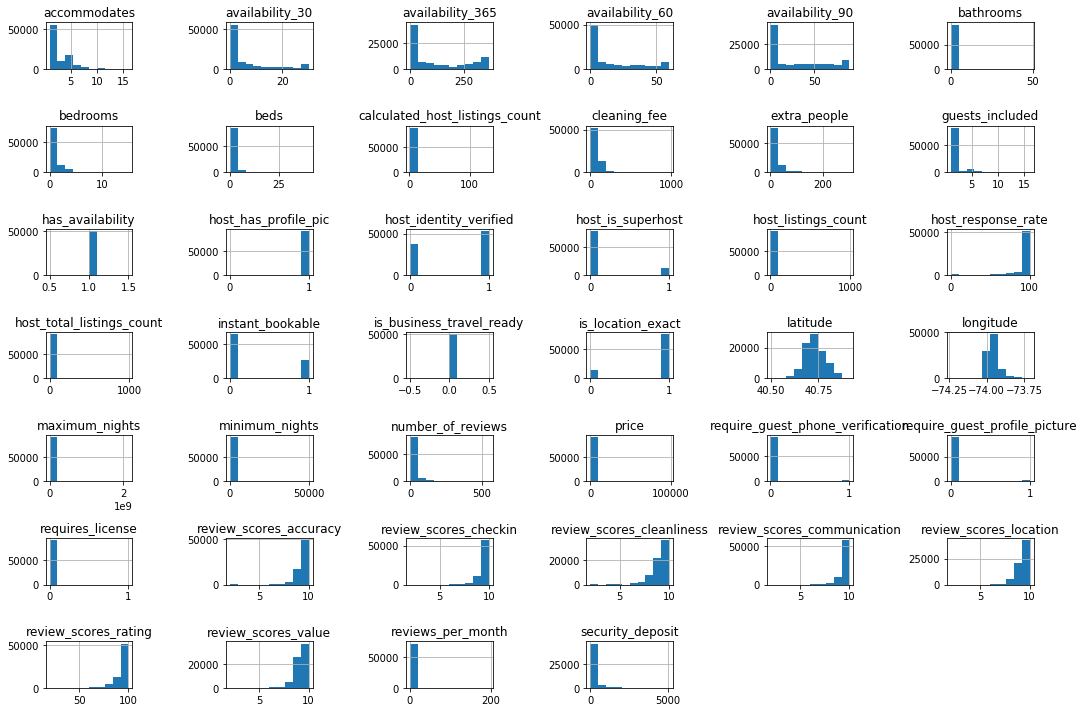

In [149]:
listings_df_new.hist(figsize=(15,10))
plt.tight_layout();

In [150]:
# Adjust listings_df_new to include only the top 99% of values for 'price' to remove outliers
listings_df_new = listings_df_new[listings_df_new['price'] < listings_df_new['price'].quantile(0.99)]

In [151]:
listings_df_new.shape

(90318, 46)

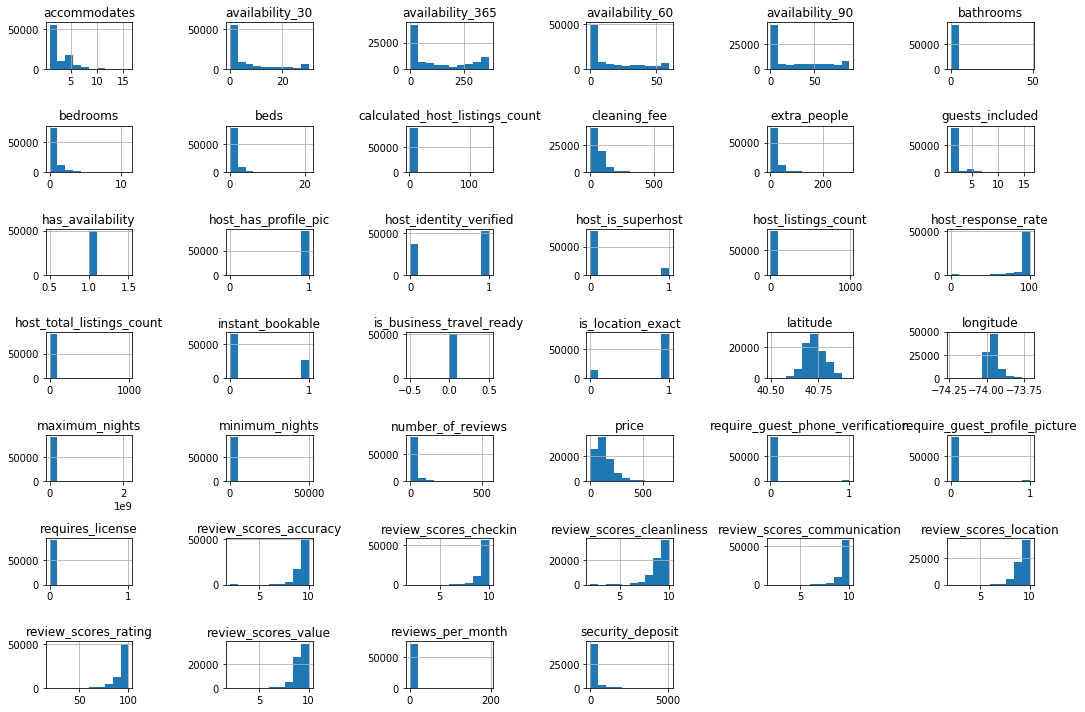

In [152]:
listings_df_new.hist(figsize=(15,10))
plt.tight_layout();

> **reviews_df - To Clean**
- **date** - change type to datetime
- **comments** - drop rows with missing comments

In [153]:
# Change 'date' type to datetime
reviews_df_new['date'] = pd.to_datetime(reviews_df_new['date'])

In [154]:
# Drop rows with missing comments
reviews_df_new = reviews_df_new.dropna()

In [155]:
reviews_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029007 entries, 0 to 1030207
Data columns (total 6 columns):
listing_id       1029007 non-null int64
id               1029007 non-null int64
date             1029007 non-null datetime64[ns]
reviewer_id      1029007 non-null int64
reviewer_name    1029007 non-null object
comments         1029007 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 55.0+ MB


## Exploratory Data Analysis

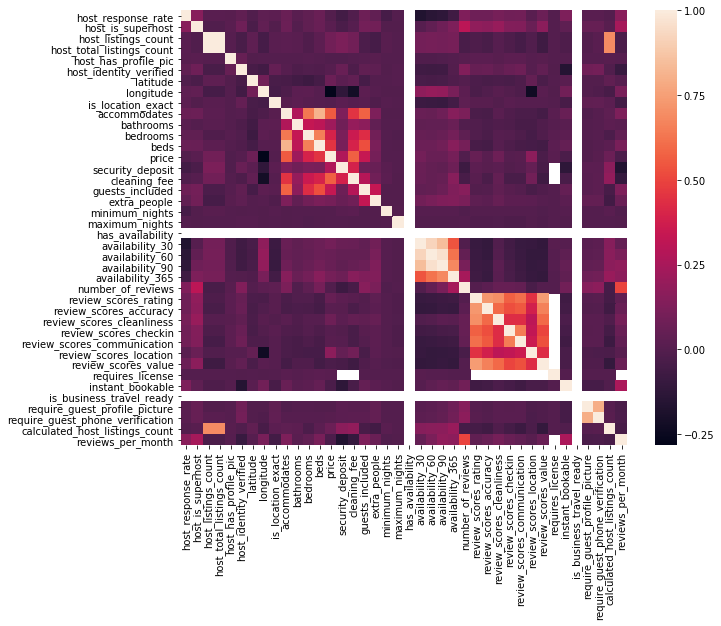

In [156]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(listings_df_new.corr(),xticklabels=True, yticklabels=True, ax=ax);

In [157]:
listings_df_new['review_scores_rating_grouped'] = pd.cut(x=listings_df_new['review_scores_rating'], bins=8,
                                                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']).values.add_categories('N/A')
listings_df_new['review_scores_rating_grouped'] = listings_df_new['review_scores_rating_grouped'].fillna('N/A')

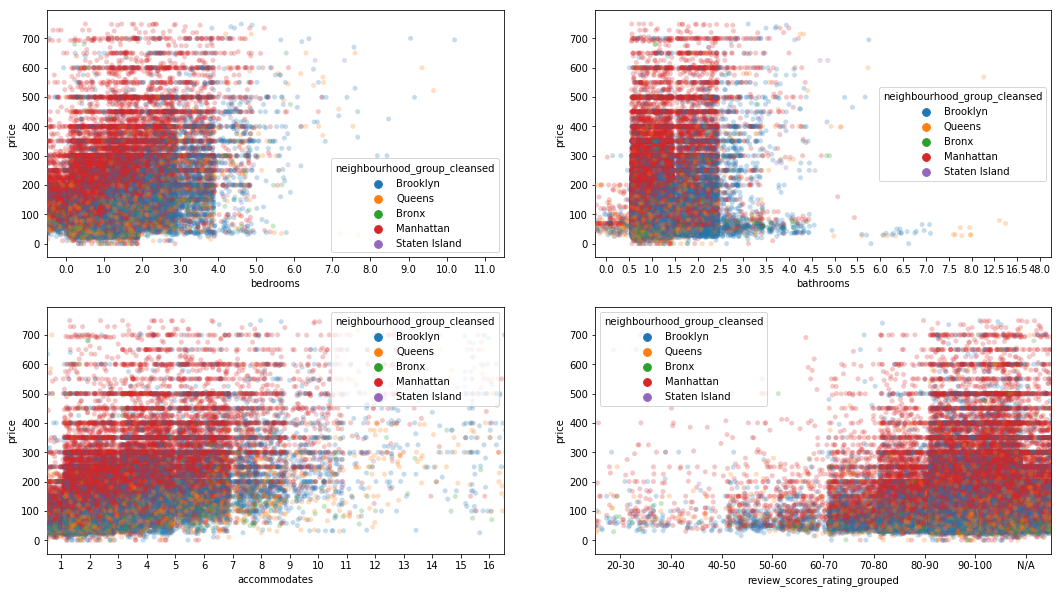

In [158]:
fig,axes = plt.subplots(2, 2,figsize=(18,10))
axes[0,0] = sns.stripplot(x='bedrooms', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[0,0])
axes[0,1] = sns.stripplot(x='bathrooms', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[0,1]);
axes[1,0] = sns.stripplot(x='accommodates', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[1,0]);
axes[1,1] = sns.stripplot(x='review_scores_rating_grouped', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[1,1]);

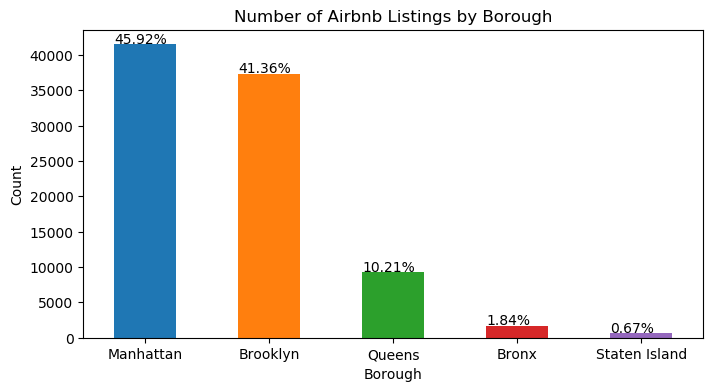

In [160]:
with plt.style.context(('default')):
    fig, ax = plt.subplots(figsize=(8,4))
    listings_df_new['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')
    plt.title('Number of Airbnb Listings by Borough')
    ax.set_xlabel('Borough')
    ax.set_ylabel('Count')
    plt.xticks(rotation='horizontal')
    
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x(), i.get_height()+200, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=10)

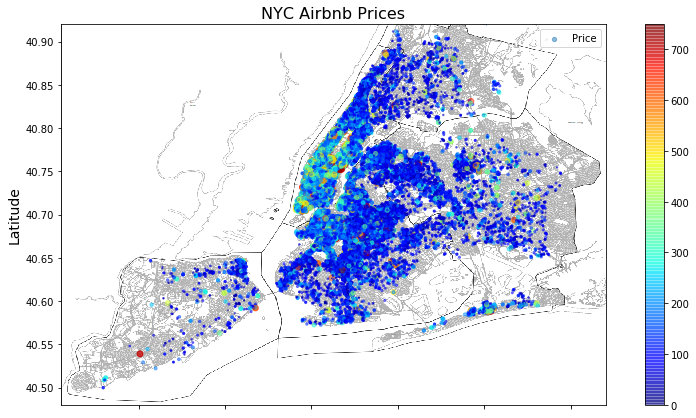

In [161]:
nyc_img = mpimg.imread('nyc-base-map.png')
ax = listings_df_new.plot(kind="scatter", x='longitude', y='latitude', figsize=(14,7),
                        s=listings_df_new['price']/20, label="Price",
                        c=listings_df_new['price'], cmap='jet',
                        colorbar=True, alpha=0.5,
                      )
plt.imshow(nyc_img, extent=[-74.29, -73.66, 40.48, 40.92], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('NYC Airbnb Prices', fontsize=16);

In [166]:
calendar_df_new_by_day = calendar_df_new.groupby(['neighbourhood_group_cleansed','date'], as_index=False).median()
calendar_df_new_by_day.head()

,neighbourhood_group_cleansed,date,available,price,year,month,day
0,Bronx,2017-09-02,1,87.5,2017,9,2
1,Bronx,2017-09-03,1,80.0,2017,9,3
2,Bronx,2017-09-04,1,75.0,2017,9,4
3,Bronx,2017-09-05,1,75.0,2017,9,5
4,Bronx,2017-09-06,1,75.0,2017,9,6


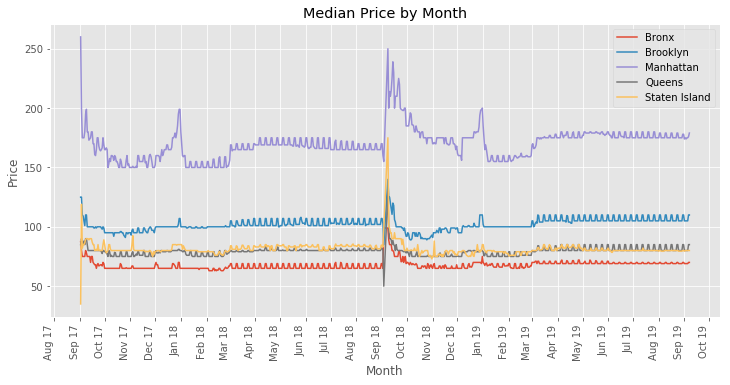

In [175]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(12,6))

    for key, data in calendar_df_new_by_day.groupby('neighbourhood_group_cleansed'):
        data.plot(x='date', y='price', ax=ax, label=key)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    plt.xticks(rotation='vertical')
    ax.set_xlabel('Month')
    ax.set_ylabel('Price')
    ax.set_title('Median Price by Month');

## Fit Model

In [63]:
skewed = ['bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included',
          'host_listings_count', 'host_response_rate', 'host_total_listings_count', 'maximum_nights', 'minimum_nights',
          'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'security_deposit']

In [64]:
listings_df_feat_log_trans = pd.DataFrame(data = listings_df_new)
listings_df_feat_log_trans[skewed] = listings_df_new[skewed].apply(lambda x: np.log(x + 1))

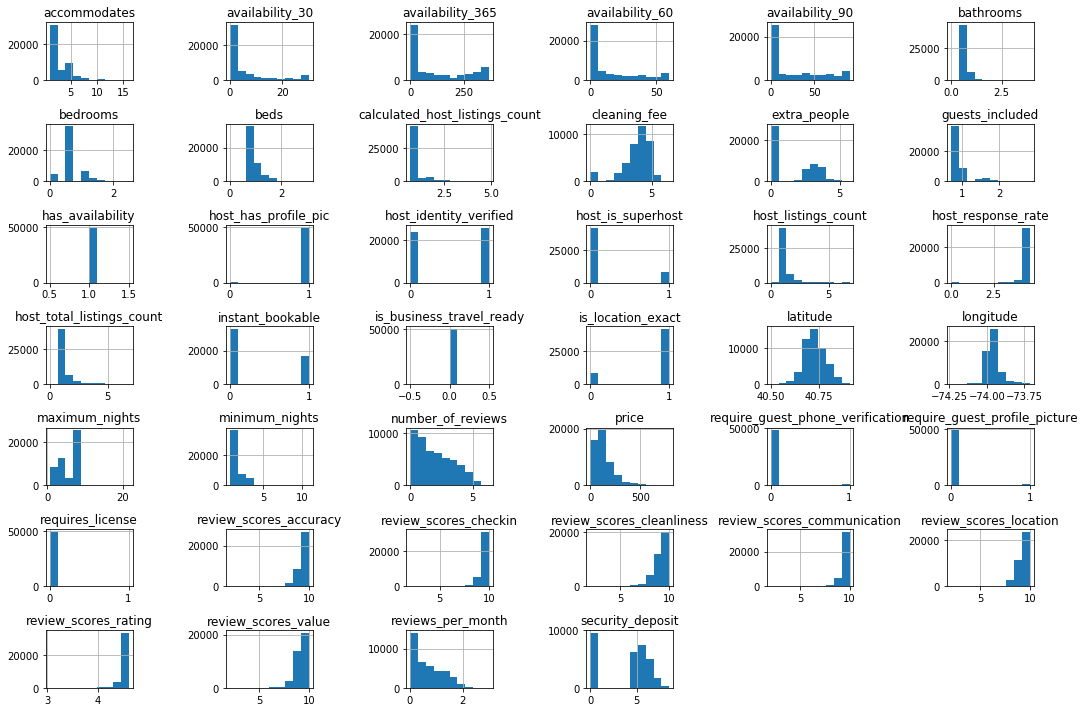

In [65]:
listings_df_feat_log_trans.hist(figsize=(15,10))
plt.tight_layout();

In [66]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the 'price' column
    3. Create y as the 'price' column
    4. Drop the 'price' column from X
    5. For each numeric variable in X, fill the NaN with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop respondent and expected salary columns
    df = df.drop(['price', 'review_scores_rating_grouped'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object', 'category']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listings_df_feat_log_trans) 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
#Instanitate
lm_model = LinearRegression(normalize=True)
#Fit
lm_model.fit(X_train, y_train)
#Predict
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [69]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

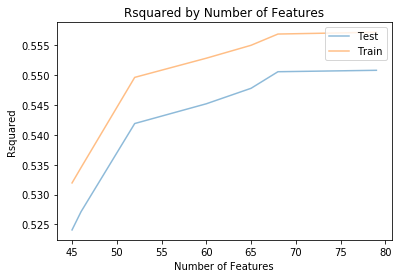

In [70]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25, 1]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [71]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

79
0.5508257367286786
0.5572063697849612


In [72]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
18,has_availability,5.019444e+15,5.019444e+15
3,host_total_listings_count,3.567558e+12,3.567558e+12
2,host_listings_count,-3.567558e+12,3.567558e+12
6,latitude,-1.913391e+02,1.913391e+02
57,property_type_Hotel,1.140719e+02,1.140719e+02
62,property_type_Resort,1.055502e+02,1.055502e+02
9,bathrooms,9.305316e+01,9.305316e+01
69,room_type_Shared room,-8.477758e+01,8.477758e+01
75,cancellation_policy_strict,-8.000115e+01,8.000115e+01
47,property_type_Bungalow,-7.996929e+01,7.996929e+01
